In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt

In [2]:
# In Maman 22, our goal is to analyze the wine dataset from Maman 21.
# Since we already cleaned it on the previous project, we can reuse it.

data = pd.read_csv('winequality-white-clean.csv', dtype=np.float).drop(columns = ['Unnamed: 0'])
data.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


# Cluster Analysis

Cluster Analysis involves several techniques with the purpose of grouping sets of objects in the data in a way that they will belong in the same group ( according to criteria we will define ). sets which are more "similar" will be grouped together as clusters, while "dissimilar" sets will be far away from each other.
It is an unsupervised classification, which means we will not define a target but instead, we will search for new wisdom on the data, observing the clusters created.

# Quality measures for cluster analysis

In order to evaluate the quality of the group's separation, we can do several things. 
A. manually review the data, searching for clear boundaries of the clusters created. We will like to see some features/dimensions grouped to clusters together, on the other hand, some distance between different clusters.

B. we can make different calculations to check the ratio between in-cluster grouping, and the outer-cluster separation. 
popular measures: SSE(sum of the square error from the items of each cluster), Intercluster distance, Intracluster distance for each cluster, Inertia.

Different distance functions may suit one date type but do a bad job on others.

# Proposed algorithms

There are several clustering methods:
* Partitioning - pratition objects into k clusters, each partition will belong eventualy to one ccluster. They optimize a criteria ( like similarity distance )
* Density-Based - which create cluster by finding high vs low density ereas, then assingning each area a cluster.
* Hirerchical Based - from a tree type structure based on hirerachy, the clusters are built from the tree brances. Can be biult top-down or buttom-up.
* Grid based - the problem space is diveded into final number of cells(grid-like)

# K-Means

K-Means is a clusterings method aims to divide the data to k clusters where each observation belongs only to one cluster. it searches a mean value that represents the distance of the observations from the mean of the clusters.
Pseodo code:
1. Choose the number of clusters(K) and obtain the data points 
2. Place the centroids c_1, c_2, ..... c_k randomly 
3. Repeat steps 4 and 5 until convergence or until the end of a fixed number of iterations
4. for each data point x_i:
       - find the nearest centroid(c_1, c_2 .. c_k) 
       - assign the point to that cluster 
5. for each cluster j = 1..k
       - new centroid = mean of all points assigned to that cluster
6. End 

The algorithm was selected due to it's simplicity, ease of choosing different cllusters number and there are no preassumptions required to use it.

# DBSCAN
DBSCAN is a Density based clustering method, it takes a set of high density ereas in problem space and group them together grouping them to clusters, while marking low density ereas as outliers.
the algorithm has to main parameters: epsilon(eps)- the radius from a point to others, minPts - a support level to set a point as a core points to be grouped as a cluster.

Pseudocode:

DBSCAN(D, eps, MinPts)

    C = 0
    for each unvisited point P in dataset D
    mark P as visited
    NeighborPts = regionQuery(P, eps)
    if sizeof(NeighborPts) < MinPts
        mark P as NOISE
    else
        C = next cluster
        expandCluster(P, NeighborPts, C, eps, MinPts)

expandCluster(P, NeighborPts, C, eps, MinPts)

    add P to cluster C
    for each point P' in NeighborPts
        if P' is not visited
            mark P' as visited
            NeighborPts' = regionQuery(P', eps)
            if sizeof(NeighborPts') >= MinPts
                NeighborPts = NeighborPts joined with NeighborPts'
        if P' is not yet member of any cluster
            add P' to cluster C

regionQuery(P, eps)

    return all points within P's eps-neighborhood (including P)
    
The algorithm was selected due to its ability to handle noisy data, find clusters we haven't thoght of from differnt dimentions, and it use it with a small number of parameters.

In [3]:
# Kemans
# The fisrt thing we will do is to find an optimal number of K for our clusters.
# We will do it using the intertia parameter. 
# searching a point where the cost will not decrease much between values 
# (this implies that probably two centers are used in the same grouping of data

# search for best k
inertia_list = []

for k in range (1, 11):
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(data)

    # Sum of distances of samples to their closest cluster center
    inertia_list.append(kmeans_model.inertia_)
    print ("k:",k, " cost:", kmeans_model.inertia_)

k: 1  cost: 9438035.641581599
k: 2  cost: 3630514.382306715
k: 3  cost: 2311076.43561089
k: 4  cost: 1693049.2133186979
k: 5  cost: 1407743.655103532
k: 6  cost: 1220088.9746879297
k: 7  cost: 1068221.8797207968
k: 8  cost: 957894.2635225309
k: 9  cost: 866178.4959266772
k: 10  cost: 794682.2270276218


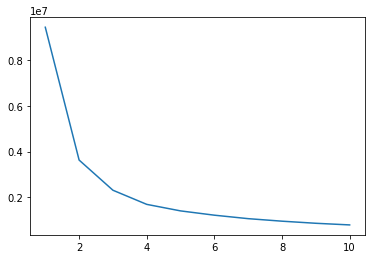

In [4]:
plt.plot(range(1,11), inertia_list)
# Here we can see that the optimal number of clusters is 3-4

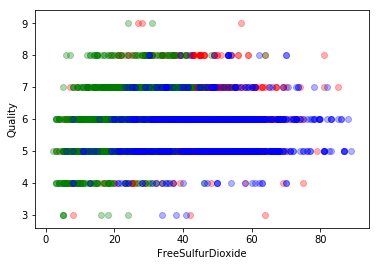

In [5]:

# run the K-Means algorithm
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(data)

# Explore data scattering ( select the column number 1-11)
# from the list ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
#       'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH',
#       'Sulphates', 'Alcohol', 'Quality']
x , y = (5, 11)

c = ['red','green','blue','yellow','black']
for i in range(max(kmeans_model.labels_)+1):
    plt.scatter(data.values[kmeans_model.labels_==i,x], data.values[kmeans_model.labels_==i,y], color=c[i], alpha = 0.3)
plt.xlabel(data.columns[x])
plt.ylabel(data.columns[y]);

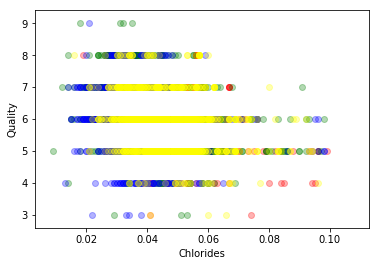

In [6]:
# now run the K-Means algorithm with k=4
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(data)

# Explore data scattering ( select the column number 1-11)
# from the list ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
#       'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH',
#       'Sulphates', 'Alcohol', 'Quality']

x , y = (4, 11)

for i in range(max(kmeans_model.labels_)+1):
    plt.scatter(data.values[kmeans_model.labels_==i,x], data.values[kmeans_model.labels_==i,y], color=c[i], alpha = 0.3)
plt.xlabel(data.columns[x])
plt.ylabel(data.columns[y]);

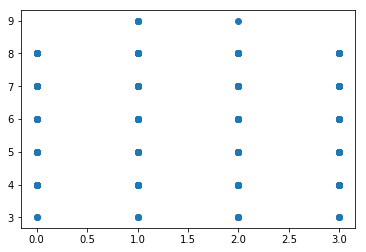

In [7]:
# scatter labels VS quality. for expoloration
# The labels are didnt reveal directly low/high wine quality but can be used to ensemble with other models.

plt.scatter(kmeans_model.labels_, data.Quality)

In [8]:
# As we can see, we can find very intresting gruops of areas found in both k=3,k=4 parameters
# ( although not necceserly direct labels-quality correlation )
# The labels collected from the K-Means clustering can be used for farther reaserch
# based on clusters found using others ensemble methodes.

In [9]:
# search for best eps
# Remark: I have got better results on scealed data , due to the nature of DBscan searching the density


scealer = StandardScaler()
data_scealed = scealer.fit_transform(X=data)

eps_list = []

for eps in [2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.9, 3]:
 
    # Create a DBSCAN model on our data, Changing eps to measure how much clusters will created.  random_state helps ensure that the algorithm returns the same results each time.
    dbscan_model = DBSCAN(eps=eps, min_samples=3, p=2).fit(data_scealed)

    # Sum of distances of samples to their closest cluster center
    eps_list.append(len(np.unique(dbscan_model.labels_)))
    print ("eps:", eps, " cost:", len(np.unique(dbscan_model.labels_)))

eps: 2  cost: 29
eps: 2.1  cost: 22
eps: 2.2  cost: 16
eps: 2.3  cost: 7
eps: 2.4  cost: 6
eps: 2.5  cost: 4
eps: 2.6  cost: 3
eps: 2.7  cost: 2
eps: 2.9  cost: 3
eps: 3  cost: 2


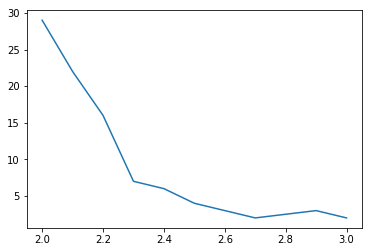

In [10]:
plt.plot([2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.9, 3], eps_list)

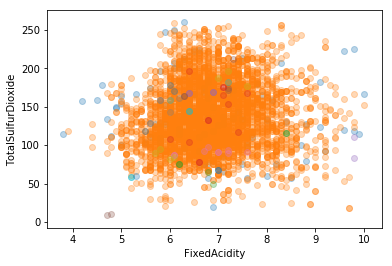

In [11]:
# We can see that eps=2.3 can be a goot candidate value for eps
# DBscan did worked as expected, extracting the outliers of the data.

dbscan_model = DBSCAN(eps=2.3, min_samples=2, p=2).fit(data_scealed)
for i in np.unique(dbscan_model.labels_):
    plt.scatter(data.values[dbscan_model.labels_==i,0], data.values[dbscan_model.labels_==i,6] , alpha = 0.3)
plt.xlabel('FixedAcidity')
plt.ylabel('TotalSulfurDioxide');

(array([2.000e+00, 0.000e+00, 1.300e+01, 5.000e+00, 3.400e+01, 2.400e+01,
        5.000e+01, 6.700e+01, 2.780e+02, 2.350e+02, 3.960e+02, 6.680e+02,
        1.290e+03, 1.793e+03, 4.475e+03, 3.462e+03, 3.415e+03, 3.625e+03,
        3.750e+03, 3.811e+03, 3.836e+03, 5.363e+03, 3.395e+03, 2.630e+03,
        2.369e+03, 1.979e+03, 1.607e+03, 2.452e+03, 1.351e+03, 1.095e+03,
        8.020e+02, 6.010e+02, 4.540e+02, 3.230e+02, 3.730e+02, 1.670e+02,
        1.220e+02, 7.300e+01, 4.700e+01, 5.200e+01, 4.800e+01, 6.200e+01,
        2.000e+01, 2.200e+01, 1.900e+01, 1.200e+01, 9.000e+00, 6.000e+00,
        3.000e+00, 3.000e+00]),
 array([-3.68601827, -3.50718295, -3.32834762, -3.1495123 , -2.97067697,
        -2.79184164, -2.61300632, -2.43417099, -2.25533567, -2.07650034,
        -1.89766501, -1.71882969, -1.53999436, -1.36115904, -1.18232371,
        -1.00348839, -0.82465306, -0.64581773, -0.46698241, -0.28814708,
        -0.10931176,  0.06952357,  0.2483589 ,  0.42719422,  0.60602955,
         0.

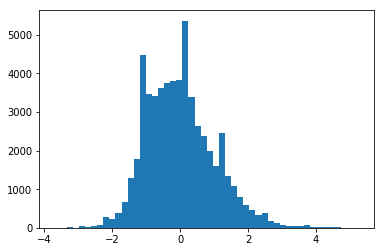

In [12]:
plt.hist(data_scealed.flatten(), bins=50)

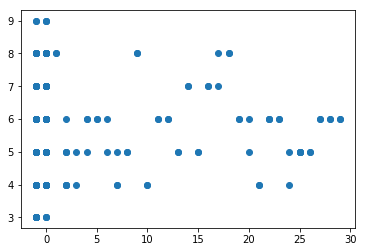

In [13]:
# We can see here that some of the labels can help us with regions of low/high quality of the wine.
# This requires further analisys


plt.scatter(dbscan_model.labels_, data.Quality)

In [14]:
dbscan_model.labels_.max()

29